In [47]:
print("Hola mundo")

Hola mundo


In [48]:
a = 3
b = 9
c = a + b
c,type(c)

(12, int)

In [49]:
type(10),type(10.10),type("hola")

(int, float, str)

In [50]:
L = [1,3,4,5,6,"hola","mundo",5.6]
T = (1,3,4,5,6,"hola","mundo",5.6)
L,T

([1, 3, 4, 5, 6, 'hola', 'mundo', 5.6], (1, 3, 4, 5, 6, 'hola', 'mundo', 5.6))

In [51]:
type(L),type(T)

(list, tuple)

In [52]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
type(range(0,10))

range

In [54]:
import numpy as np


In [55]:
np.array([1,3,4,5])


array([1, 3, 4, 5])

In [56]:
type(np.array([1,3,4,5]))

numpy.ndarray

In [57]:
from numpy import *

In [58]:
type(array([1,4,5,6]))

numpy.ndarray

In [59]:
def suma(a , b):
    return a+b

suma(5,6)

11

In [60]:
suma(5.5,6.7)

12.2

In [61]:
suma("hola","mundo")

'holamundo'

In [62]:
suma([1,3,4,5],[5,6,7,8])

[1, 3, 4, 5, 5, 6, 7, 8]

In [63]:
suma(array([1,3,4]),np.array([8,9,6]))

array([ 9, 12, 10])

# ¿Por qué funciona?

https://docs.python.org/es/3/tutorial/classes.html

## Ámbitos y espacios de nombres en Python

Antes de ver clases, primero debo decirte algo acerca de las reglas de ámbito de Python. 

In [64]:
# Que va mostrar el siguiente codigo

def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print(" * Despues de do_local:", spam)
    do_nonlocal()
    print(" * Despues de do_nonlocal:", spam)
    do_global()
    print(" * Despues de do_global:", spam)

scope_test()
print("Ambito global:", spam)

 * Despues de do_local: test spam
 * Despues de do_nonlocal: nonlocal spam
 * Despues de do_global: nonlocal spam
Ambito global: global spam


## Explicacion del codigo

Este es un ejemplo que muestra como hacer referencia a distintos ámbitos y espacios de nombres, y cómo las declaraciones global y nonlocal afectan la asignación de variables:

In [65]:
#!pip install --upgrade termcolor

In [66]:
#!pip install --upgrade termcolor
from termcolor import colored, cprint

print(colored('hello', 'red'), colored('world', 'green'),colored('!', 'cyan')) 

def mi_print(text, spam,op=0):
    color =  ("cyan","magenta","red")[op]  
    print(colored(text, color), colored(spam, 'green'))



hello world !


In [67]:
def scope_test():
    def do_local():
        spam = "local spam"
        mi_print("     - Dentro de do_local:", spam,1)

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"
        mi_print("     - Dentro de do_nonlocal:", spam,1)

    def do_global():
        global spam
        spam = "global spam"
        mi_print("     - Dentro de do_global:", spam,1)

    spam = "test spam"
    mi_print(" * Antes de do_local:",spam)
    do_local()
    mi_print(" * Despues de do_local:", spam)
    do_nonlocal()
    mi_print(" * Despues de do_nonlocal:", spam)
    do_global()
    mi_print(" * Despues de do_global:", spam)

scope_test()
mi_print("Ambito global:", spam,2)

 * Antes de do_local: test spam
     - Dentro de do_local: local spam
 * Despues de do_local: test spam
     - Dentro de do_nonlocal: nonlocal spam
 * Despues de do_nonlocal: nonlocal spam
     - Dentro de do_global: global spam
 * Despues de do_global: nonlocal spam
Ambito global: global spam


**El espacio de nombres local** a una función se crea cuando la función es llamada, y se elimina cuando la función retorna o lanza una excepción que no se maneje dentro de la función. (Podríamos decir que lo que pasa en realidad es que ese espacio de nombres se «olvida».) Por supuesto, las llamadas recursivas tienen cada una su propio espacio de nombres local.



hay 3 o 4 ámbitos anidados cuyos espacios de nombres son directamente accesibles:

- el alcance más interno, que es inspeccionado primero, contiene los nombres locales
- los alcances de cualquier función que encierra a otra, son inspeccionados a partir del alcance más cercano, contienen nombres no locales, pero también no globales
- el penúltimo alcance contiene nombres globales del módulo actual
- el alcance más externo (el último inspeccionado) es el espacio de nombres que contiene los nombres integrados



### 

<div style="color:red; font-size: 20px"> Los espacios de nombres se crean en diferentes momentos y con diferentes tiempos de vida. </div>

<div class="titulo">Hola titulo </div>

El espacio de nombres que contiene los nombres incluidos se crea cuando se inicia el intérprete, y nunca se borra. 

El espacio de nombres global de un módulo se crea cuando se lee la definición de un módulo; normalmente, los espacios de nombres de módulos también duran hasta que el intérprete finaliza. Las instrucciones ejecutadas en el nivel de llamadas superior del intérprete, ya sea desde un script o interactivamente, se consideran parte del módulo llamado __main__, por lo tanto tienen su propio espacio de nombres global. (Los nombres incluidos en realidad también viven en un módulo; este se llama builtins.)

In [68]:
import builtins

#Este módulo proporciona acceso directo a todos los identificadores “incorporados” de Python.
spam = "test spam"
spam2 = "test spam"

In [69]:
builtins.chr(64)
builtins.sum( (1,5) ), builtins.globals()["spam"]

(6, 'test spam')

In [70]:
builtins.int("10"), builtins.float("10.5"), builtins.str(10.5)

(10, 10.5, '10.5')

# Clases

Las clases proveen una forma de empaquetar datos y funcionalidad juntos. Al crear una nueva clase, se crea un nuevo tipo de objeto, permitiendo crear nuevas instancias de ese tipo. Cada instancia de clase puede tener atributos adjuntos para mantener su estado. Las instancias de clase también pueden tener métodos (definidos por su clase) para modificar su estado.




## La forma más sencilla de definición de una clase se ve así:

```python
class ClassName:
    <statement-1>
    .
    .
    .
    <statement-N>
```

Cuando se ingresa una definición de clase, se crea un nuevo espacio de nombres, el cual se usa como ámbito local; por lo tanto, todas las asignaciones a variables locales van a este nuevo espacio de nombres. En particular, las definiciones de funciones asocian el nombre de las funciones nuevas allí.

Cuando una definición de clase se finaliza normalmente (al llegar al final) se crea un objeto clase. Básicamente, este objeto envuelve los contenidos del espacio de nombres creado por la definición de la clase

In [71]:
class MyClass:
    """Un ejemplo de una clase en Python"""
    i = 12345

    def f(self):
        return 'Hola mundo'

## Objetos clase

Los objetos clase soportan dos tipos de operaciones: hacer referencia a atributos e instanciación.

Para hacer referencia a atributos se usa la sintaxis estándar de todas las referencias a atributos en Python: **objeto.nombre**. Los nombres de atributo válidos son todos los nombres que estaban en el espacio de nombres de la clase cuando ésta se creó. 

In [72]:
MyClass.i

12345

In [73]:
MyClass.f

<function __main__.MyClass.f(self)>

### La instanciación de clases 

usa la notación de funciones. Hacé de cuenta que el objeto de clase es una función sin parámetros que retorna una nueva instancia de la clase.

In [74]:
x = MyClass()
# crea una nueva instancia de la clase y asigna este objeto a la variable local x.

In [75]:
x.i, x.f()

(12345, 'Hola mundo')

In [76]:
# Creamos otra isntancia de la clase
y = MyClass()
y.i, y.f()

(12345, 'Hola mundo')

### Muchas clases necesitan crear objetos con instancias en un estado inicial particular. 

Por lo tanto una clase puede definir un método especial llamado __init__(), de esta forma

In [77]:
class Complex:
    def __init__(self, realpart, imagpart): # Constructor de la clase
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i

(3.0, -4.5)

In [78]:
y = Complex(5.0, 10.5)
y.r, y.i

(5.0, 10.5)

 ### Atributos y métodos.

 Los atributos de datos se corresponden con las «variables de instancia» en Smalltalk, y con las «variables miembro» en C++. 
 
 <div style="color: red">Nota:</div> 
 Los atributos de datos no necesitan ser declarados. tal como las variables locales son creados la primera vez que se les asigna algo.

In [79]:
x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)
del x.counter

16


In [80]:
#x.counter

In [81]:
x = MyClass()
x.f()

'Hola mundo'

<div style="color: red">Nota:</div> 
Lo que tienen de especial los métodos es que el objeto es pasado como el primer argumento de la función. 

En nuestro ejemplo, la llamada x.f() es exactamente equivalente a MyClass.f(x).

En general, llamar a un método con una lista de n argumentos es equivalente a llamar a la función correspondiente con una lista de argumentos que es creada insertando el objeto del método antes del primer argumento.



In [82]:
MyClass.f(x)

'Hola mundo'

### Atributos de clase vs Atributos de instancia ( Variables de clase y de instancia )

En general, las variables de instancia son para datos únicos de cada instancia y las variables de clase son para atributos y métodos compartidos por todas las instancias de la clase:



In [83]:
class Dog:
    
    kind = 'canino'         # variable de clase compartida por todas las instancias

    def __init__(self, name):
        self.name = name    # variable de instancia única para la instancia

d = Dog('Firulais')
e = Dog('Firilaysa')

d.kind,e.kind,Dog.kind                  # compartido por todos los perros

('canino', 'canino', 'canino')

In [84]:
d.name, e.name    # unico para cada perro

('Firulais', 'Firilaysa')

Los datos compartidos pueden tener efectos inesperados que involucren objetos mutable como ser listas y diccionarios. Por ejemplo, la lista tricks en el siguiente código no debería ser usada como variable de clase porque una sola lista sería compartida por todos las instancias de Dog:

In [85]:
class Dog:
    
    tricks = []             # uso incorrecto de una variable de clase

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Firulais')
e = Dog('Firilaysa')

d.add_trick('Dar la pata') 
e.add_trick('hacerse el muerto') 

In [86]:
# compartido por todas las instancias de la clase
d.tricks                


['Dar la pata', 'hacerse el muerto']

In [87]:
e.tricks

['Dar la pata', 'hacerse el muerto']

El diseño correcto de esta clase sería usando una variable de instancia:

In [88]:
class Dog:
    
    def __init__(self, name):
        self.name = name
        self.tricks = []    # crea una nueva lista vacía para cada perro

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Firulais')
e = Dog('Firilaysa')

d.add_trick('Dar la pata') 
e.add_trick('hacerse el muerto') 
d.tricks,e.tricks
#print(d.tricks,e.tricks)

(['Dar la pata'], ['hacerse el muerto'])

A menudo, el primer argumento de un método se llama self (uno mismo). Esto es una convención: el nombre self no significa nada en especial para Python. 

Observá que, sin embargo, si no sigues la convención tu código puede resultar menos legible a otros programadores de Python.

In [89]:
# Funcion definida fuera de la clase
def f1(yo, x, y):
    return min(x, x+y)

class C:
    f = f1

    def g(yo):
        return 'hello world'

    h = g
    
a = C()


In [90]:
a.f(4,5)

4

Cualquier objeto función que es un atributo de clase define un método para instancias de esa clase. No es necesario que el la definición de la función esté textualmente dentro de la definición de la clase: asignando un objeto función a una variable local en la clase también está bien. 

Fijate que esta práctica normalmente sólo sirve para confundir al que lea un programa.

In [91]:
a.g(),a.h()

('hello world', 'hello world')

Los métodos pueden llamar a otros métodos de la instancia usando el argumento self:



In [92]:
class Bag:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)

    def addtwice(self, x):
        self.add(x)
        self.add(x)

In [93]:
b = Bag()

In [94]:
b.add(10)

In [95]:
b.addtwice(5)

In [96]:
b.data

[10, 5, 5]

In [97]:
b.data.append(7)

In [98]:
b.data

[10, 5, 5, 7]

# Ejercicio:

Modifica la clase Persona, la cual cada objeto tiene que tener su propio nombre

In [99]:
class Persona: 
	# atributos
	nombre = "Michel"
	edad = 18 
	
	# metodos
	def camina(self):
		print(self.nombre + " está caminando")
  
p1 = Persona() # la variable p1 contiene un objeto de la clase Persona
p1.camina()
print(p1.nombre)  
print(p1.edad)

Michel está caminando
Michel
18


In [100]:
p3 = Persona() # la variable p3 contiene un objeto de la clase Persona
p3.camina()
print(p3.nombre)  
print(p3.edad)

Michel está caminando
Michel
18


Una posible solucion es:

In [101]:
class Persona: 
	# atributos
    num_personas = 0
    
    def __init__(self,nombre,edad):
        self.nombre = nombre
        self.edad = edad
        Persona.num_personas +=1
    
    # metodos
    def camina(self):
        print(self.nombre + " está caminando")
        
    def numeroPersonas():
        print(f"Existen {Persona.num_personas} personas ")
  
p1 = Persona("Michel",18) # la variable p1 contiene un objeto de la clase Persona
p1.camina()
print(p1.nombre)  
print(p1.edad)

p3 = Persona("Juan",18) # la variable p1 contiene un objeto de la clase Persona
p3.camina()
print(p3.nombre)  
print(p3.edad)

Michel está caminando
Michel
18
Juan está caminando
Juan
18


In [102]:
Persona.numeroPersonas()

Existen 2 personas 


In [103]:
p3.num_personas,p1.num_personas

(2, 2)

## Ejercicio 1

Crea la clase Coche que contenga las siguientes propiedades:

- matrícula (string)
- marca (string)
- kilometros_recorridos (float)
- gasolina (float)

La clase tendrá un método llamado avanzar() que recibirá como argumento el número de kilómetros a conducir y sumará los kilómetros recorridos al valor de la propiedad kilometros_recorridos. El método también restará al valor de gasolina el resultado de los kilómetros multiplicado por 0'1. La clase también contendrá otro método llamado repostar() que recibirá como argumento los litros introducidos que deberán sumarse a la variable gasolina. Por último, será necesario controlar que el método avanzar nunca obtendrá un número negativo en la gasolina. En dicho caso, deberá mostrar el siguiente mensaje: "Es necesario repostar para recorrer la cantidad indicada de kilómetros".

Ejemplo:

- avanzar(50) # gasolina = 50
- avanzar(100) # kilometros_recorridos = 100, gasolina = 40
- avanzar(40) # kilometros_recorridos = 140, gasolina = 36
- avanzar(180) # kilometros_recorridos = 320, gasolina = 18

In [104]:
class Coche:
    def __init__(self, matricula, marca, kilometros_recorridos=0.0, gasolina=0.0):
        self.matricula = matricula
        self.marca = marca
        self.kilometros_recorridos = kilometros_recorridos
        self.gasolina = gasolina

    def avanzar(self, kilometros):
        # Calcular la gasolina necesaria para el viaje
        gasolina_necesaria = kilometros * 0.1

        # Comprobar si hay suficiente gasolina para realizar el viaje
        if self.gasolina >= gasolina_necesaria:
            self.kilometros_recorridos += kilometros
            self.gasolina -= gasolina_necesaria
            print(f"Avanzado {kilometros} km. Kilómetros totales: {self.kilometros_recorridos}, Gasolina restante: {self.gasolina} L.")
        else:
            print("Es necesario repostar para recorrer la cantidad indicada de kilómetros")

    def repostar(self, litros):
        self.gasolina += litros
        print(f"Repostados {litros} L de gasolina. Gasolina total: {self.gasolina} L.")


In [105]:
c1 = Coche("1234ABC", "Renault", gasolina=40)
c1.avanzar(50)
c1.avanzar(100)
c1.avanzar(40)
c1.avanzar(180)
c1.repostar(10)
c1.avanzar(180)

Avanzado 50 km. Kilómetros totales: 50.0, Gasolina restante: 35.0 L.
Avanzado 100 km. Kilómetros totales: 150.0, Gasolina restante: 25.0 L.
Avanzado 40 km. Kilómetros totales: 190.0, Gasolina restante: 21.0 L.
Avanzado 180 km. Kilómetros totales: 370.0, Gasolina restante: 3.0 L.
Repostados 10 L de gasolina. Gasolina total: 13.0 L.
Es necesario repostar para recorrer la cantidad indicada de kilómetros


# Ejercicio 2

Crea una caminata aleatoria utilizando clases:

Una caminata aleatoria es un proceso matemático que describe una trayectoria que consiste en una sucesión de pasos aleatorios. Para simular una caminata aleatoria en un plano 2D, podemos crear una clase CaminataAleatoria que registre la posición actual y pueda hacer movimientos en direcciones aleatorias

In [106]:
import random

class CaminataAleatoria:
    def __init__(self):
        self.x = 0
        self.y = 0

    def paso(self):
        direccion = random.choice(['N', 'S', 'E', 'O'])  # Norte, Sur, Este, Oeste
        if direccion == 'N':
            self.y += 1
        elif direccion == 'S':
            self.y -= 1
        elif direccion == 'E':
            self.x += 1
        elif direccion == 'O':
            self.x -= 1

    def posicion_actual(self):
        return (self.x, self.y)

    def realizar_caminata(self, pasos):
        caminata = [(self.x, self.y)]
        for _ in range(pasos):
            self.paso()
            caminata.append((self.x, self.y))
        return caminata

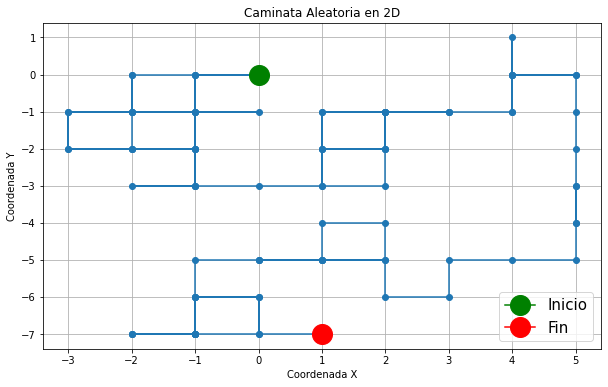

In [113]:
import matplotlib.pyplot as plt

# Crear una instancia de la caminata aleatoria
caminante = CaminataAleatoria()

# Realizar una caminata de 10 pasos
trayectoria = caminante.realizar_caminata(100)

# Extraer coordenadas X e Y
x, y = zip(*trayectoria)

# Graficar la caminata aleatoria
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.plot(x[0], y[0], marker='o',c="g", markersize=20,label='Inicio' )
plt.plot(x[-1], y[-1], marker='o',c="r",markersize=20,label='Fin' )
plt.legend(prop={'size': 15})
plt.title('Caminata Aleatoria en 2D')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

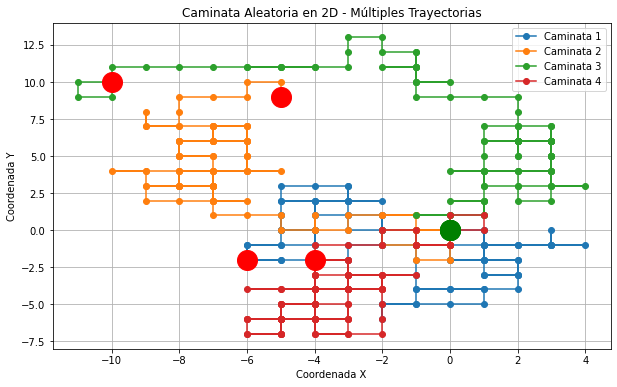

In [108]:
def graficar_caminatas(n_caminatas, n_pasos):
    plt.figure(figsize=(10, 6))
    
    for i in range(n_caminatas):
        caminante = CaminataAleatoria()
        trayectoria = caminante.realizar_caminata(n_pasos)
        x, y = zip(*trayectoria)
        plt.plot(x, y, marker='o', label=f'Caminata {i + 1}')
        plt.plot(x[0], y[0], marker='o',c="g", markersize=20 )
        plt.plot(x[-1], y[-1], marker='o',c="r",markersize=20 )
    
    plt.title('Caminata Aleatoria en 2D - Múltiples Trayectorias')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la función para 4 caminatas con 10 pasos cada una
graficar_caminatas(4, 100)

# Private y protected

A diferencia de otros lenguajes de Programación Orientada a Objetos, todos los métodos y atributos en Python son públicos. Es decir, no es posible definir una variable como private o protected.

Existe una convención de añadir como prefijo un guión bajo (_) a los atributos que consideramos como protected y dos guiones bajos (__) a las variables que consideramos private.

In [109]:
class Persona:
    def __init__(self, nombre, edad):
        self._nombre = nombre  # atributo protected 
        self.__edad = edad # atributo private
        
    def muestra(self):
        print(f"{self._nombre} tiene {self.__edad} años")

In [110]:
p1 = Persona("Michel",18)

In [111]:
p1._nombre

'Michel'

In [112]:
p1.__edad

AttributeError: 'Persona' object has no attribute '__edad'

In [ ]:
p1.muestra()

Michel tiene 18 años


# Herencia

La sintaxis para una definición de clase derivada se ve así:

```
class DerivedClassName(BaseClassName):
    <statement-1>
    .
    .
    .
    <statement-N>

```

Python tiene dos funciones integradas que funcionan con herencia:

Usar **isinstance()** para verificar el tipo de una instancia: isinstance(obj, int) será True sólo si obj.__class__ es int o alguna clase derivada de int.

Usar **issubclass()** para verificar la herencia de clases: issubclass(bool, int) es True ya que bool es una subclase de int. Sin embargo, issubclass(float, int) es False ya que float no es una subclase de int.


Por ejemplo, todas las clases heredan de object, por lo tanto cualquier caso de herencia múltiple provee más de un camino para llegar a object. Para que las clases base no sean accedidas más de una vez, el algoritmo dinámico hace lineal el orden de búsqueda de manera que se preserve el orden de izquierda a derecha especificado en cada clase, que se llame a cada clase base sólo una vez, y que sea monótona (lo cual significa que una clase puede tener clases derivadas sin afectar el orden de precedencia de sus clases bases).


In [ ]:
class A:
    def __init__(self,a):
        self.a = a
        
    def muestra(self):
        print(f"En clase A, Valor a-> {self.a}")

In [ ]:
Obj_a = A(5)
Obj_a.muestra()

En clase A, Valor a-> 5


In [ ]:
class B(A):
    def __init__(self,a,b):
        A.__init__(self,a)
        self.b = b
        
    def muestra(self):
        print(f"En clase B, Valor b-> {self.b}")
        A.muestra(self)
        
obj_b = B(2,3)
obj_b.muestra()

En clase B, Valor b-> 3
En clase A, Valor a-> 2


In [ ]:
# Op 2
class B(A):
    def __init__(self,a,b):
        self.a = a
        self.b = b
        
    def muestra(self):
        print(f"En clase B, Valor b-> {self.b}")
        A.muestra(self)
        
obj_b = B(2,3)
obj_b.muestra()

En clase B, Valor b-> 3
En clase A, Valor a-> 2


# Los codigos anteriores son equivalentes?

<div style="color: red">Nota:</div> 

- Los codigos anteriores son ejemplos de herencia simple en Python
- Dan resultados similares, pero el segundo no llama al constructor de la clase padre


In [ ]:
class A:
    def __init__(self,a):
        self.a = a
        self.b = 10
        print("En el constructor de A")
        
    def muestra(self):
        print(f"En clase A, Valor a-> {self.a}")
        print(f"En clase A, Valor b-> {self.b}")

In [ ]:
class B(A):
    def __init__(self,a,b):
        A.__init__(self,a)
        self.b = b
        print("En el constructor de B")
        
    def muestra(self):
        print(f"En clase B, Valor b-> {self.b}")
        A.muestra(self) # Llama explícitamente al método muestra() de la clase A
        
obj_b = B(2,3)
obj_b.muestra()

En el constructor de A
En el constructor de B
En clase B, Valor b-> 3
En clase A, Valor a-> 2
En clase A, Valor b-> 3


In [ ]:
# Op 2
class B(A):
    def __init__(self,a,b):
        self.a = a # Establece directamente self.a, sin llamar al constructor de A
        self.b = b
        print("En el constructor de B")

    def muestra(self):
        print(f"En clase B, Valor b-> {self.b}")
        A.muestra(self) # Llama explícitamente al método muestra() de la clase A
        
obj_b = B(2,3)
obj_b.muestra()

En el constructor de B
En clase B, Valor b-> 3
En clase A, Valor a-> 2
En clase A, Valor b-> 3


In [ ]:
obj_b_to_A = A(obj_b)
obj_b_to_A.muestra()

En el constructor de A
En clase A, Valor a-> <__main__.B object at 0x733f6dd72d80>
En clase A, Valor b-> 10


Este código no llama al constructor de la clase A. En su lugar, directamente inicializa self.a y self.b. 

Si la clase A realiza alguna inicialización importante en su constructor, esta inicialización no se llevará a cabo.
Esto puede ser un problema si la clase A depende de que se ejecute su constructor para funcionar correctamente (por ejemplo, si configura valores predeterminados o realiza alguna configuración necesaria).
Al igual que el primer código, este también llama explícitamente al método muestra() de A después de imprimir el valor de b.

La subclase puede añadir funcionalidades. Esta técnica permite reutilizar código.

In [ ]:
class Dispositivo:
    def __init__(self,identificador,marca):
        self.identificador = identificador
        self.marca = marca

    def conectar(self):
        print("¡Conectado!")

# la clase base se indica entre paréntesis
class Teclado(Dispositivo):
	def __init__(self,identificador,marca,tipo):
		# llamada al constructor del padre
		Dispositivo.__init__(self,identificador,marca)
		self.tipo = tipo
	# metodo de la subclase
	def pulsar_tecla(self,tecla):
		print(tecla)

t1 = Teclado("0001", "Logitech", "AZERTY")
print(f"Id: {t1.identificador}, Marca: {t1.marca}, tipo: {t1.tipo}")
t1.conectar()
t1.pulsar_tecla("a")

Id: 0001, Marca: Logitech, tipo: AZERTY
¡Conectado!
a


# Polimorfismo

Permite a distintos objetos responder de manera diferente a un mismo llamado de método.

Una de las ventajas del polimorfismo es que nos permite escribir código más genérico, lo que a su vez nos permite reutilizar nuestro código en una variedad de situaciones.

El polimorfismo está exhibiendo un comportamiento diferente en diferentes condiciones. El polimorfismo viene en dos sabores.

- Método de sobrecarga
- Método Anulado

Python no admite la sobrecarga de métodos como otros idiomas. Simplemente reemplazará la última función definida como la última definición. Sin embargo, podemos intentar lograr un resultado similar a la sobrecarga utilizando * args o usando argumentos opcionales.

In [ ]:
class OptionalArgDemo:
    def addNums(self, i, j, k=0):
        return i + j + k

o = OptionalArgDemo()
print(o.addNums(2,3))
print(o.addNums(2,3,7))


5
12


El polimorfismo en tiempo de ejecución no es más que una anulación del método. Funciona en conjunto con la herencia.

La anulación del método es un concepto en el que, aunque el nombre del método y los parámetros pasados son similares, el comportamiento es diferente según el tipo de objeto.

In [ ]:
class Animal:
    def makeNoise(self):
        raise NotImplementedError

class Cat(Animal):
    def makeNoise(self):
        print("Meoooowwwww")
        
class Dog(Animal):
    def makeNoise(self):
        print("Woooooof")

In [ ]:
a = Cat();
a.makeNoise() 

a = Dog();
a.makeNoise() 

Meoooowwwww
Woooooof


In [ ]:
class Figura:
    def area(self):
        pass

class Cuadrado(Figura):
    def __init__(self, lado):
        self.lado = lado

    def area(self):
        return self.lado * self.lado

class Circulo(Figura):
    def __init__(self, Radio):
        self.Radio = Radio

    def area(self):
        return 3.141592 * self.Radio**2 
    
    
class Triangulo(Figura):
    def __init__(self, base,altura):
        self.base = base
        self.altura = altura

    def area(self):
        return (self.base * self.altura)/2


In [ ]:
def calcular_area(figura):
    return figura.area()

In [ ]:
cuadrado = Cuadrado(5)
circulo = Circulo(3)
triangulo = Triangulo(4, 5)

print(calcular_area(cuadrado))
print(calcular_area(circulo))
print(calcular_area(triangulo))

25
28.274328
10.0


# Encapsulamiento

El Encapsulamiento es una técnica en la programación orientada a objetos que nos permite ocultar los detalles internos de los objetos y exponer solo sus interfaces. En otras palabras, el encapsulamiento nos proporciona una capa adicional de seguridad al asegurarse de que los datos se manipulan solo a través de los métodos definidos en la interfaz.


Por ejemplo, supongamos que tenemos una clase Persona que tiene un atributo edad. Si no utilizamos el encapsulamiento, cualquier otro código podría modificar el valor de edad del objeto Persona sin restricciones. Así que, ¡de repente, una persona puede tener 500 años en nuestro sistema!




In [ ]:
class Persona:
    def __init__(self, edad):
        self.edad = edad

persona = Persona(28)
persona.edad = 500 # Esto no debería ser posible, sin encapsulamiento
print(persona.edad)

500


Para tener más control sobre los datos almacenados en nuestro objeto, podemos aplicar el encapsulamiento y convertir el atributo de la edad en un atributo de solo lectura utilizando el siguiente código:

In [ ]:
class Persona:
    def __init__(self, edad):
        self.__edad = edad

    @property
    def edad(self):
        return self.__edad

persona = Persona(28)
persona.edad # Retorna 28
persona.edad = 500 # Esto no es posible, con encapsulamiento

AttributeError: property 'edad' of 'Persona' object has no setter

En este ejemplo, hemos agregado el decorador @property sobre el método edad en la clase Persona. Este decorador es utilizado para convertir el método en una propiedad. Ahora podemos utilizar persona.edad para obtener el valor de edad sin necesidad de llamar al método edad() explícitamente.

In [ ]:
class Persona:
    def __init__(self, nombre, edad, direccion):
        self.nombre = nombre
        self.edad = edad
        self.__direccion = direccion

    def setDireccion(self, direccion):
        self.__direccion = direccion

    def getDireccion(self):
        return self.__direccion

In [ ]:
p = Persona("Juan", 25, "Av. Siempre Viva 123")
p.setDireccion("Calle Falsa 123")
print(p.getDireccion())  

Calle Falsa 123


<div style="color:red">Nota:</div>
Las Propiedades son una técnica utilizada en Python para proporcionar un acceso seguro y controlado a los atributos de una clase. Son métodos que se comportan como atributos, lo que significa que podemos reemplazar los métodos de acceso y modificación normales por funciones de propiedad.

In [ ]:
class Persona:
    def __init__(self, nombre, edad, direccion):
        self.nombre = nombre
        self.edad = edad
        self.__direccion = direccion

    @property
    def direccion(self):
        return self.__direccion

    @direccion.setter
    def direccion(self, direccion):
        if direccion == "Calle Falsa 123":
            raise "Error direccion falsa"    
        self.__direccion = direccion

In [ ]:
p = Persona("Juan", 25, "Av. Siempre Viva 123")
#p.direccion = "Calle Falsa 123"
p.direccion = "Calle Falsa 1234"

<div style="color:red">Nota:</div>
Es importante utilizar el Encapsulamiento y las Propiedades para controlar el acceso a los datos en nuestras clases de Python. Con ello podemos mantener nuestros datos privados, aumentar la seguridad y asegurarnos de no permitir modificaciones no deseadas de los datos.

In [ ]:
class Reverse:
    """Iterador para recorrer una secuencia hacia atrás"""
    def __init__(self, data):
        self.data = data
        self.index = len(data)

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index - 1
        return self.data[self.index]

In [ ]:
rev = Reverse('spam')

In [ ]:
iter(rev)

In [ ]:
for char in rev:
    print(char,end=" ")

m a p s 

# Ejemplos: 

In [ ]:
class Auto:
    def __init__(self, marca, modelo, año):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.kilometraje = 0

    def mostrar_descripcion(self):
        return f"{self.marca} {self.modelo} ({self.año})"

    def actualizar_kilometraje(self, km):
        if km >= self.kilometraje:
            self.kilometraje = km
        else:
            print("No puedes reducir el kilometraje.")

# Crear una instancia de Auto
mi_auto = Auto("Toyota", "Corolla", 2020)

# Mostrar descripción del auto
print(mi_auto.mostrar_descripcion())

# Actualizar y mostrar kilometraje
mi_auto.actualizar_kilometraje(15000)
print(f"Kilometraje: {mi_auto.kilometraje}")

Toyota Corolla (2020)
Kilometraje: 15000


In [ ]:
class Auto:
    def __init__(self, marca, modelo, año):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.kilometraje = 0

    def mostrar_descripcion(self):
        return f"{self.marca} {self.modelo} ({self.año})"

    def actualizar_kilometraje(self, km):
        if km >= self.kilometraje:
            self.kilometraje = km
        else:
            print("No puedes reducir el kilometraje.")

class AutoElectrico(Auto):
    def __init__(self, marca, modelo, año, autonomia_bateria):
        super().__init__(marca, modelo, año)
        self.autonomia_bateria = autonomia_bateria

    def mostrar_autonomia(self):
        return f"Autonomía de la batería: {self.autonomia_bateria} km"

# Crear una instancia de AutoElectrico
mi_auto_electrico = AutoElectrico("Tesla", "Model S", 2022, 600)

# Mostrar descripción y autonomía del auto eléctrico
print(mi_auto_electrico.mostrar_descripcion())
print(mi_auto_electrico.mostrar_autonomia())

Tesla Model S (2022)
Autonomía de la batería: 600 km


In [ ]:
class Auto:
    def __init__(self, marca, modelo, año):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.kilometraje = 0

    def mostrar_descripcion(self):
        return f"{self.marca} {self.modelo} ({self.año})"

    def actualizar_kilometraje(self, km):
        if km >= self.kilometraje:
            self.kilometraje = km
        else:
            print("No puedes reducir el kilometraje.")

class AutoElectrico(Auto):
    def __init__(self, marca, modelo, año, autonomia_bateria):
        Auto.__init__(self,marca, modelo, año)
        self.autonomia_bateria = autonomia_bateria

    def mostrar_autonomia(self):
        return f"Autonomía de la batería: {self.autonomia_bateria} km"

class AutoGasolina(Auto):
    def __init__(self, marca, modelo, año, capacidad_tanque):
        Auto.__init__(self,marca, modelo, año)
        self.capacidad_tanque = capacidad_tanque

    def mostrar_capacidad_tanque(self):
        return f"Capacidad del tanque: {self.capacidad_tanque} litros"

class AutoHibrido(AutoElectrico, AutoGasolina):
    def __init__(self, marca, modelo, año, autonomia_bateria, capacidad_tanque):
        AutoElectrico.__init__(self, marca, modelo, año, autonomia_bateria)
        AutoGasolina.__init__(self, marca, modelo, año, capacidad_tanque)

# Crear una instancia de AutoHibrido
mi_auto_hibrido = AutoHibrido(marca="Toyota", modelo= "Prius",año= 2021, autonomia_bateria= 500, capacidad_tanque= 45)

# Mostrar descripción, autonomía y capacidad del tanque
print(mi_auto_hibrido.mostrar_descripcion())
print(mi_auto_hibrido.mostrar_autonomia())
print(mi_auto_hibrido.mostrar_capacidad_tanque())


Toyota Prius (2021)
Autonomía de la batería: 500 km
Capacidad del tanque: 45 litros


In [114]:
class Auto:
    def __init__(self, marca, modelo, año):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.kilometraje = 0

    def mostrar_descripcion(self):
        return f"{self.marca} {self.modelo} ({self.año})"

    def actualizar_kilometraje(self, km):
        if km >= self.kilometraje:
            self.kilometraje = km
        else:
            print("No puedes reducir el kilometraje.")

class AutoElectrico(Auto):
    def __init__(self, marca, modelo, año, autonomia_bateria):
        Auto.__init__(self,marca, modelo, año)
        self.autonomia_bateria = autonomia_bateria

    def mostrar_autonomia(self):
        return f"Autonomía de la batería: {self.autonomia_bateria} km"

class AutoGasolina(Auto):
    def __init__(self, marca, modelo, año, capacidad_tanque):
        super().__init__(marca, modelo, año)
        self.capacidad_tanque = capacidad_tanque

    def mostrar_capacidad_tanque(self):
        return f"Capacidad del tanque: {self.capacidad_tanque} litros"

class AutoHibrido(AutoElectrico, AutoGasolina):
    def __init__(self, marca, modelo, año, autonomia_bateria, capacidad_tanque):
        super().__init__(marca, modelo, año, autonomia_bateria)
        AutoGasolina.__init__(self, marca, modelo, año, capacidad_tanque)

# Crear una instancia de AutoHibrido
mi_auto_hibrido = AutoHibrido(marca="Toyota", modelo= "Prius",año= 2021, autonomia_bateria= 500, capacidad_tanque= 45)

# Mostrar descripción, autonomía y capacidad del tanque
print(mi_auto_hibrido.mostrar_descripcion())
print(mi_auto_hibrido.mostrar_autonomia())
print(mi_auto_hibrido.mostrar_capacidad_tanque())


Toyota Prius (2021)
Autonomía de la batería: 500 km
Capacidad del tanque: 45 litros


<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Michel López.
</footer>